In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Syria_dataset_re.csv")

In [3]:
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,2007,NaN,2073.129675,28,106.0,1503769
1,2008,1.990,2615.204465,28,110.7,1105698
2,2009,2.112,2631.014472,22,113.4,1054466
3,2010,2.274,2918.115607,31,114.5,1005472
4,2011,2.322,2691.214038,34,113.6,755445


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,10.00000,9.000000,9.000000,10.000000,10.000000,1.000000e+01
mean,2011.50000,2.891333,2213.806427,30.200000,108.430000,6.240723e+05
std,3.02765,0.738295,508.857408,3.966527,5.030805,5.328356e+05
min,2007.00000,1.990000,1534.543991,22.000000,100.400000,1.982200e+04
25%,2009.25000,2.274000,1816.251088,28.250000,104.950000,1.491780e+05
50%,2011.50000,2.830000,2073.129675,30.000000,109.300000,6.159755e+05
75%,2013.75000,3.645000,2631.014472,33.250000,112.850000,1.042218e+06
max,2016.00000,3.806000,2918.115607,36.000000,114.500000,1.503769e+06


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)
df['GDP'].fillna(mean(df.GDP),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

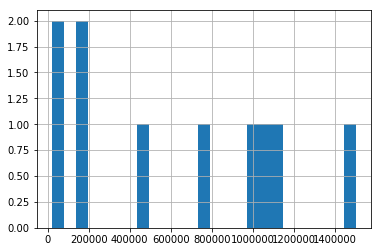

In [7]:
#check population histogram
df['Population'].hist(bins=25)

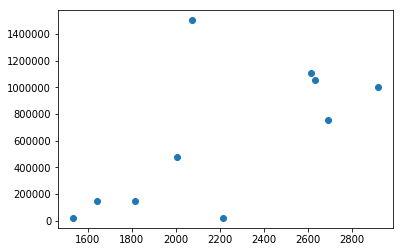

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

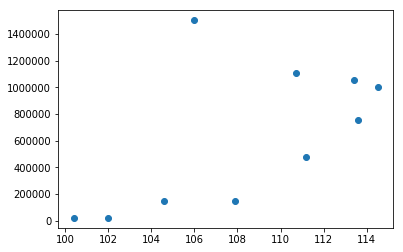

In [9]:
#check relationship between Density and Population
import matplotlib.pyplot as plt
plt.scatter(df['Density'], df['Population'])
plt.show() 

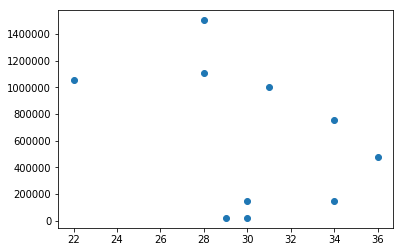

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

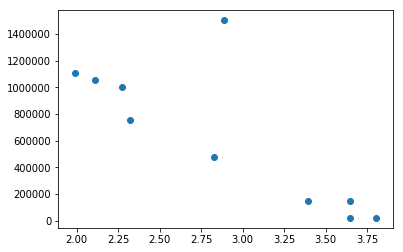

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -959961.550587
Coefficient:  [ 715.52500326]
R squared value:  0.415052310414


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -6268805.06322
Coefficient:  [ 63569.83642183]
R squared value:  0.36023897625


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  2210950.83616
Coefficient:  [-52545.64689266]
R squared value:  0.153005751436


In [15]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  2398623.78581
Coefficient:  [-613748.49635917]
R squared value:  0.642838581392


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  629759.635777
MAE Score:  527504.937131
MSE Score:  396597198855.0
R squared value:  0.350792878967


In [17]:
# include all variables to build a model
X = df[['GDP', 'Density', 'GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  245204.239643
MAE Score:  200484.744574
MSE Score:  60125119138.7
R squared value:  0.688061373273


In [18]:
# include all variables to build a model
X = df[['Density', 'GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  212889.383389
MAE Score:  193595.486665
MSE Score:  45321889559.7
R squared value:  0.694916570668


In [19]:
# include all variables to build a model
X = df[['GDP', 'GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  214322.524116
MAE Score:  205311.23605
MSE Score:  45934144343.2
R squared value:  0.627849377392


In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.378071301639
Predicted Density for year:  2017 [[ 103.39663677]]
Predicted Density for year:  2018 [[ 102.58834081]]
Predicted Density for year:  2019 [[ 101.78004484]]
Predicted Density for year:  2020 [[ 100.97174888]]
Predicted Density for year:  2021 [[ 100.16345291]]
Predicted Density for year:  2022 [[ 99.35515695]]


array([[ 104.20493274]])

In [21]:
#predict the GPI for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GPI']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GPI for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.654931579502
Predicted GPI for year:  2017 [[ 3.92577055]]
Predicted GPI for year:  2018 [[ 4.09618236]]
Predicted GPI for year:  2019 [[ 4.26659417]]
Predicted GPI for year:  2020 [[ 4.43700598]]
Predicted GPI for year:  2021 [[ 4.60741779]]
Predicted GPI for year:  2022 [[ 4.7778296]]


array([[ 3.75535874]])

In [22]:
# Forecasted Population of Indonesia
X = df[['Density','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
    

    
var_2017 = [[103.39663677,3.92577055]]
var_2018 = [[102.58834081,4.09618236]]
var_2019 = [[101.78004484,4.26659417]]                               
var_2020 = [[100.97174888,4.43700598]]
var_2021 = [[100.16345291,4.60741779]]
var_2022 = [[99.35515695,4.7778296]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [-46117.16159775]
Predicted Population for year 2018:  [-167463.80819841]
Predicted Population for year 2019:  [-288810.45414205]
Predicted Population for year 2020:  [-410157.10074271]
Predicted Population for year 2021:  [-531503.74668635]
Predicted Population for year 2022:  [-652850.39328701]


In [23]:
lm2.predict([[104.20493274,3.75535874]])

array([ 75229.48434589])